In [14]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [15]:
m = mp.Model()

x = m.add_var(name='Chapas', var_type=mp.CONTINUOUS, lb=0)
y = m.add_var(name='Barras', var_type=mp.CONTINUOUS, lb=0)

m.objective = mp.maximize(40 * x + 35 * y)

m += x <= 550
m += y <= 580
m += (x / 800) + (y / 600) <= 1

m.optimize()


Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 1 (-2) rows, 2 (0) columns and 2 (-2) elements
Clp1000I sum of infeasibilities 0 - average 0, 2 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj -0 Dual inf 88.333331 (2)
Clp0000I Optimal - objective value 28562.5
Clp0000I Optimal - objective value 28562.5
Clp0000I Optimal - objective value 28562.5
Coin0511I After Postsolve, objective 28562.5, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 28562.5 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [16]:
print(f"Produção de Chapas: {x.x:.4f}")
print(f"Produção de Barras: {y.x:.4f}")
print(f"Max return: {m.objective_value}")

Produção de Chapas: 550.0000
Produção de Barras: 187.5000
Max return: 28562.5


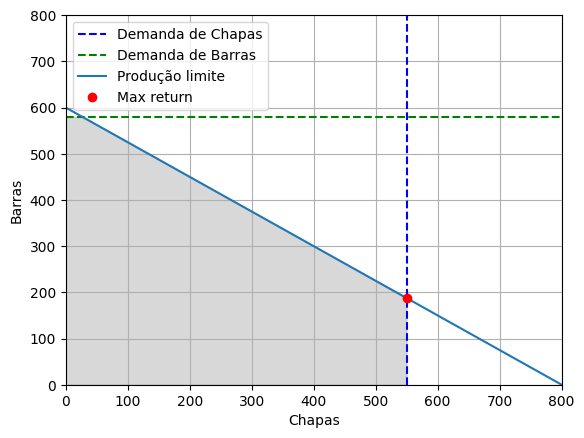

In [21]:
x_space = np.linspace(0, 800, 800)

r1 = 550
plt.axvline(x=r1, color='blue', linestyle='--', label="Demanda de Chapas")

r2 = 580
plt.axhline(y=r2, color='green', linestyle='--', label="Demanda de Barras")

r3 = 600 * (1 - x_space / 800)
plt.plot(x_space, r3, label="Produção limite")


plt.xlim(0, 800)
plt.ylim(0, 800)

plt.xlabel("Chapas")
plt.ylabel("Barras")
plt.plot(x.x, y.x, 'ro', label="Max return")
plt.fill_between(x_space, np.minimum(r3, r2), where=(x_space <= r1), color="gray", alpha=0.3)

plt.grid()
plt.legend()
plt.show()